# Final Project

### Dataset Decription

In [5]:
#shape of data
import pandas as pd  
df = pd.read_csv("marketing_campaign.csv", sep=';') 
print(df.shape)         # returns (num_rows, num_columns) :contentReference[oaicite:0]{index=0}  
print(len(df))          # returns number of rows :contentReference[oaicite:1]{index=1}  
df.head()

(2240, 29)
2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


- Number of samples: 2,240 customers

- Number of features: 24 input features after encoding (skip DTcustomer, Complain, Z_CostContact, Z_Revenue)

- Target variable: Response — 1 if the customer accepted the most recent campaign, 0 otherwise

### Data Preprocessing

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# 1. Load Dataset

df = pd.read_csv("marketing_campaign.csv", sep=';')
df.columns = df.columns.str.strip()  # Remove extra spaces
print(df.columns.tolist())  # Optional: check column names


# 2. Cleaning / Handling Missing Values

numeric_cols = ['Kidhome', 'Teenhome', 'Income', 
                'MntFishProducts','MntMeatProducts','MntFruits',
                'MntSweetProducts','MntWines','MntGoldProds',
                'NumDealsPurchases','NumCatalogPurchases','NumStorePurchases',
                'NumWebPurchases','NumWebVisitsMonth','Recency']

# Keep only existing numeric columns
numeric_cols = [col for col in numeric_cols if col in df.columns]
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = ['Education','Marital_Status']
categorical_cols = [col for col in categorical_cols if col in df.columns]
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


# 3. Define Features and Target

target = 'Response'
# Drop target and irrelevant columns
X = df.drop(columns=[target, 'Dt_Customer','ID','Z_CostContact','Z_Revenue'])
y = df[target]


# 4. Preprocessing: Encoding & Scaling

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['Education','Marital_Status']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])


# 5. Train / Validation / Test Split

# First, split off the test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Then, split the remaining into training (80% of temp) and validation (20% of temp)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)


# 6. Fit Preprocessor and Transform

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)


# 7. Output shapes

print("Training features shape:", X_train_processed.shape)
print("Validation features shape:", X_val_processed.shape)
print("Testing features shape:", X_test_processed.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Testing labels shape:", y_test.shape)

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Training features shape: (1433, 33)
Validation features shape: (359, 33)
Testing features shape: (448, 33)
Training labels shape: (1433,)
Validation labels shape: (359,)
Testing labels shape: (448,)


### Hyperparameter Search for Logistic Regression

Best C based on validation AUC: 0.0095
Validation AUC: 0.8446
Validation Accuracy: 0.8691


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


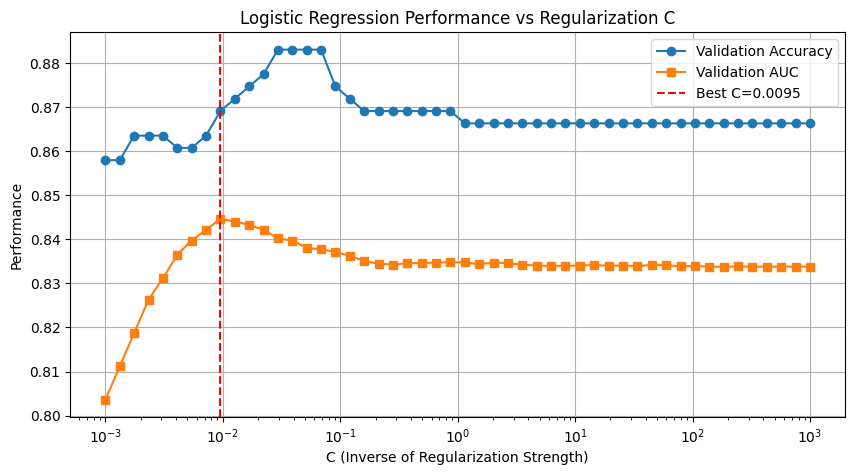

In [ ]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


# 1. Define hyperparameter range

C_values = np.logspace(-3, 3, 50)  # 30 values from 0.001 to 1000
val_accuracy = []
val_auc = []


# 2. Train Logistic Regression for each C

for C in C_values:
    model = LogisticRegression(
        C=C,
        max_iter=1000,
        solver='lbfgs',
        random_state=42
    )
    model.fit(X_train_processed, y_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val_processed)
    y_val_proba = model.predict_proba(X_val_processed)[:,1]
    
    # Evaluate
    acc = accuracy_score(y_val, y_val_pred)
    auc = roc_auc_score(y_val, y_val_proba)
    
    val_accuracy.append(acc)
    val_auc.append(auc)


# 3. Find best parameter

best_idx = np.argmax(val_auc)  # Using AUC as criterion
best_C = C_values[best_idx]
print(f"Best C based on validation AUC: {best_C:.4f}")
print(f"Validation AUC: {val_auc[best_idx]:.4f}")
print(f"Validation Accuracy: {val_accuracy[best_idx]:.4f}")


# 4. Plot performance

plt.figure(figsize=(10,5))
plt.semilogx(C_values, val_accuracy, marker='o', label='Validation Accuracy')
plt.semilogx(C_values, val_auc, marker='s', label='Validation AUC')
plt.axvline(best_C, color='r', linestyle='--', label=f'Best C={best_C:.4f}')
plt.xlabel("C (Inverse of Regularization Strength)")
plt.ylabel("Performance")
plt.title("Logistic Regression Performance vs Regularization C")
plt.legend()
plt.grid(True)
plt.show()

### Train the final model with best C

In [13]:
# Combine training + validation for final model
import numpy as np
X_final = np.vstack([X_train_processed, X_val_processed])
y_final = np.concatenate([y_train, y_val])

final_model = LogisticRegression(
    C=best_C, max_iter=1000, solver='lbfgs', random_state=42
)
final_model.fit(X_final, y_final)

# Evaluate on the test set
y_test_pred = final_model.predict(X_test_processed)
y_test_proba = final_model.predict_proba(X_test_processed)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score

test_acc = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

### Evaluation Metrics

Test Accuracy: 0.8728
Test AUC: 0.8846


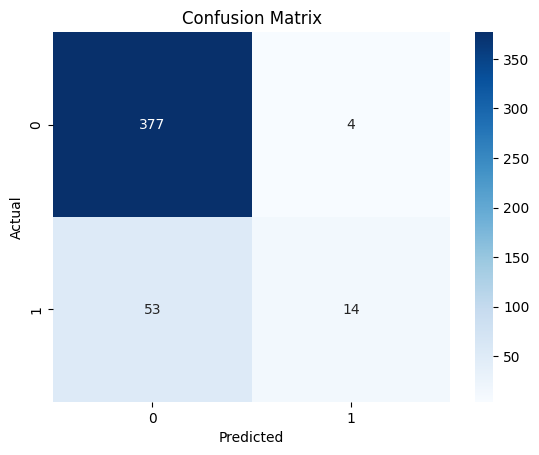

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", round(test_acc, 4))

test_auc = roc_auc_score(y_test, y_test_proba)
print("Test AUC:", round(test_auc, 4))

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0     0.8767    0.9895    0.9297       381
           1     0.7778    0.2090    0.3294        67

    accuracy                         0.8728       448
   macro avg     0.8273    0.5992    0.6296       448
weighted avg     0.8619    0.8728    0.8399       448



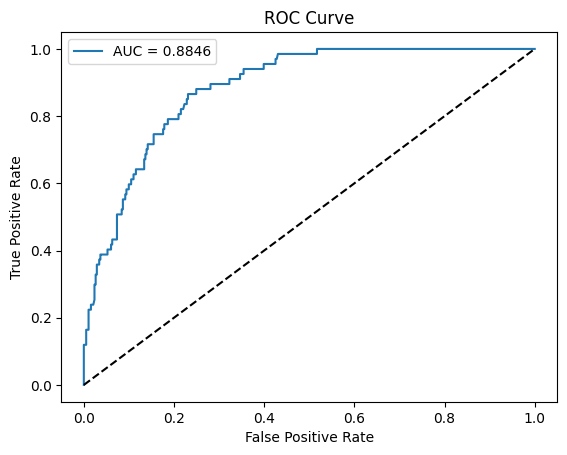

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

print(classification_report(y_test, y_test_pred, digits=4))

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
plt.plot(fpr, tpr, label=f"AUC = {test_auc:.4f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Interpret the coefficients to see which features make a customer more or less likely to respond

In [ ]:
import pandas as pd
import numpy as np


# 1. Predict probabilities on the test set

y_test_proba = final_model.predict_proba(X_test_processed)[:, 1]  # probability of Response=1

# Copy the test dataframe and add predicted probability + actual response
X_test_df = X_test.copy()
X_test_df['Predicted_Probability'] = y_test_proba
X_test_df['Actual_Response'] = y_test.values


# 2. Select features to display

features_to_show = [
    'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 
]

# Keep only columns that exist in X_test_df (some may have been dropped during preprocessing)
features_to_show = [f for f in features_to_show if f in X_test_df.columns]


# 3. Top 10 Most Likely Responders

top_10 = X_test_df.sort_values(by='Predicted_Probability', ascending=False).head(10)
top_10_df = top_10[features_to_show + ['Predicted_Probability', 'Actual_Response']]
print("Top 10 Most Likely to Respond:")
display(top_10_df)  


# 4. Top 10 Least Likely Responders

bottom_10 = X_test_df.sort_values(by='Predicted_Probability', ascending=True).head(10)
bottom_10_df = bottom_10[features_to_show + ['Predicted_Probability', 'Actual_Response']]
print("\nTop 10 Least Likely to Respond:")
display(bottom_10_df)

Top 10 Most Likely to Respond:


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Predicted_Probability,Actual_Response
1710,1986,Graduation,Married,83512.0,0,0,0.934705,1
987,1969,Graduation,Married,75759.0,0,0,0.886785,1
1845,1975,PhD,Married,86836.0,0,0,0.886772,1
1722,1991,Graduation,Single,90273.0,0,0,0.812996,1
1087,1958,PhD,Together,84460.0,0,0,0.799427,1
591,1975,Master,Married,92163.0,0,0,0.754413,1
1301,1953,Graduation,Together,94384.0,0,0,0.707134,1
703,1988,Master,Single,90247.0,0,0,0.671381,1
1982,1951,Graduation,Married,94642.0,0,0,0.613267,0
1076,1981,PhD,Married,87171.0,0,0,0.591699,0



Top 10 Least Likely to Respond:


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Predicted_Probability,Actual_Response
178,1959,Graduation,Together,38285.0,2,1,0.015681,0
1818,1956,Graduation,Married,50387.0,0,2,0.019114,0
1685,1969,Graduation,Married,42231.0,1,1,0.019226,0
806,1971,Master,Married,56850.0,0,1,0.019726,0
1186,1965,Graduation,Married,44393.0,1,1,0.021201,0
2220,1979,Graduation,Married,58025.0,0,1,0.021580,0
1445,1958,Graduation,Married,51876.0,0,0,0.021891,0
2019,1972,Graduation,Together,30261.0,1,2,0.022229,0
1196,1965,2n Cycle,Married,46891.0,0,1,0.022996,0
1382,1958,Graduation,Together,51381.5,1,1,0.023736,0
